# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 
Download the data from [here](https://drive.google.com/file/d/1o-vZHHSywBksnPuGRunvpdYN7grYbe8h/view?usp=sharing) and place it in the data folder

In [2]:
# Your code here
boston = pd.read_csv('../data/boston_data.csv')
boston.isna().sum()
#boston

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [3]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


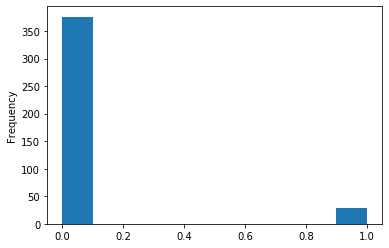

In [4]:
boston.chas.plot(kind='hist')

In [5]:
from scipy import stats
z = np.abs(stats.zscore(boston))
threshold = 3
np.where(z > 3)

(array([  9,  14,  20,  28,  29,  34,  36,  37,  38,  47,  53,  56,  57,
         62,  67,  70,  71,  71,  79,  88,  89,  91,  98, 101, 106, 111,
        111, 112, 114, 116, 136, 141, 148, 148, 150, 158, 160, 160, 161,
        165, 166, 170, 170, 177, 184, 192, 196, 198, 200, 200, 202, 205,
        212, 214, 218, 223, 226, 232, 234, 238, 241, 246, 250, 251, 251,
        252, 252, 254, 258, 258, 264, 272, 272, 272, 273, 273, 285, 285,
        297, 303, 304, 312, 314, 314, 321, 333, 337, 341, 347, 352, 355,
        369, 380, 382, 382, 400, 400, 401, 401, 401, 402], dtype=int64),
 array([ 3, 11, 11,  1,  7,  0, 13,  3, 11,  3,  1,  3,  1, 11,  3,  1,  3,
        13,  3, 13,  5, 11,  3,  1,  1,  1,  7,  1,  0,  0,  3, 11,  3,  5,
         3,  3,  1, 13,  7,  3,  3, 11, 12,  5, 11,  1, 11,  3,  5, 13,  3,
         3,  1, 11,  3, 11, 13,  1,  5,  3, 11, 11,  3,  1,  7,  1,  7,  3,
        11, 12,  3,  3,  5, 13,  0, 11,  0, 11,  3,  5, 11, 11,  1, 13,  1,
        11,  1,  3, 13, 13, 11,  3, 

In [6]:
boston = boston[(z < 3).all(axis=1)]
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


### Next, we want to explore the data. Pick several variables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

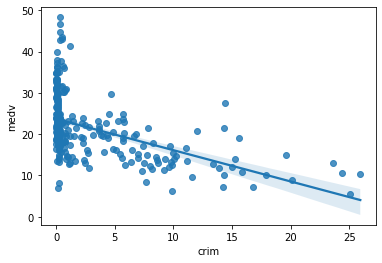

In [7]:
# Your plots here
#crim & medv (per capita crime rate by town & median value of owner-ocuppied homes in/$1000s)
#rm & medv (average number of rooms per dwelling & median value of owner-ocuppied homes in/$1000s)
#lstat & medv (lower status of the population(percent) & median value of owner-ocuppied homes in/$1000s)
#tax & medv (ful-value property-tax rate per /$10,000 & median value of owner-ocuppied homes in/$1000s)

sns.regplot(x="crim", y="medv", data=boston)
#crim & medv seem to be negatively correlated

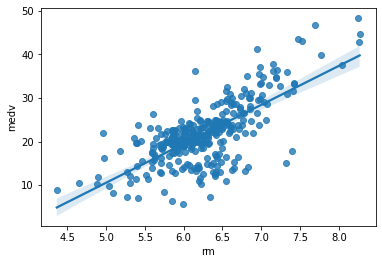

In [8]:
sns.regplot(x="rm", y="medv", data=boston)
#rm & medv seem to be positively correlated

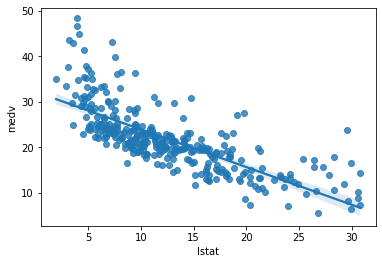

In [9]:
sns.regplot(x="lstat", y="medv", data=boston)
#lstat & medv seem to be negatively correlated

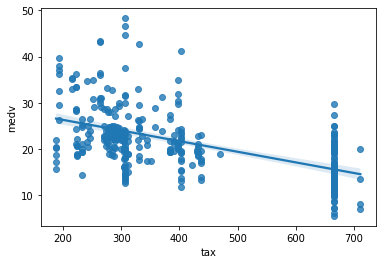

In [10]:
sns.regplot(x="tax", y="medv", data=boston)
#tax & medv seem to be negatively correlated

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
#crim & medv seem to be negatively correlated - expected
#rm & medv seem to be positively correlated - expected
#lstat & medv seem to be negatively correlated - expected
#tax & medv seem to be negatively correlated - expected
#Paolo:ok

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

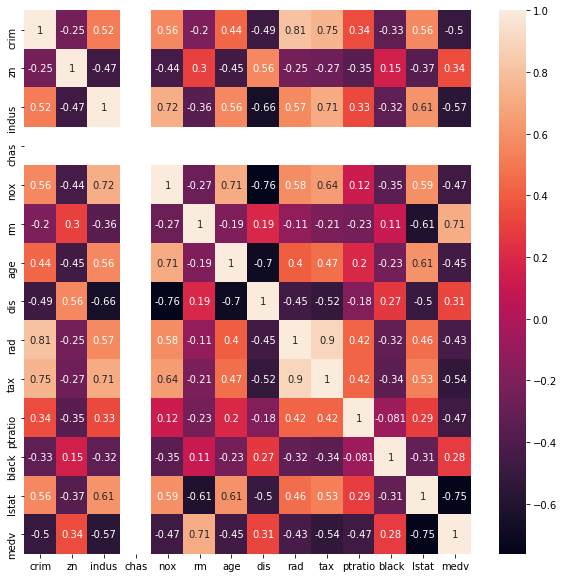

In [11]:
# Your response here
plt.figure(figsize=(10,10))
sns.heatmap(boston.corr(), annot=True)
#medv is highly correlated with the values that I considered in the previous step. 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [12]:
# Your code here
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,321.000000,321.000000,321.000000,321.0,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,2.527761,7.370717,11.034611,0.0,0.550987,6.258252,68.159813,3.800378,9.121495,398.532710,18.547664,373.198941,12.558193,21.783489
std,4.736615,15.396264,6.681523,0.0,0.110912,0.566576,27.889502,1.898933,8.411722,165.988346,2.041645,55.710630,6.483750,7.122202
min,0.006320,0.000000,1.250000,0.0,0.400000,4.368000,2.900000,1.316300,1.000000,188.000000,13.000000,81.330000,1.980000,5.600000
25%,0.083080,0.000000,5.320000,0.0,0.453000,5.891000,46.700000,2.200400,4.000000,281.000000,17.400000,378.250000,7.510000,17.800000
50%,0.214090,0.000000,8.560000,0.0,0.532000,6.223000,74.400000,3.360300,5.000000,311.000000,19.100000,392.530000,11.320000,21.200000
75%,2.449530,0.000000,18.100000,0.0,0.614000,6.556000,94.300000,5.287300,8.000000,469.000000,20.200000,396.900000,16.350000,24.600000
max,25.940600,75.000000,27.740000,0.0,0.871000,8.266000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true,y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
# Your code here
from sklearn.model_selection import train_test_split
X=boston.drop('medv', axis=1)
y=boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
model_2=RandomForestRegressor(max_depth=2)
model_4=RandomForestRegressor(max_depth=4)
model_6=RandomForestRegressor(max_depth=6)
model_8=RandomForestRegressor(max_depth=8)
model_10=RandomForestRegressor(max_depth=10)
max_depths=[2,4,6,8,10]

In [16]:
model_2.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_6.fit(X_train, y_train)
model_8.fit(X_train, y_train)
model_10.fit(X_train, y_train)

models = [model_2,model_4, model_6, model_8, model_10]
train_accuracies = []
testing_accuracies = []

for model in models:
    model.fit(X_train, y_train)
    print('Training ' + str(performance_metric(y_train, model.predict(X_train))))
    print('Testing ' + str(performance_metric(y_test, model.predict(X_test))))
    train_accuracies.append(performance_metric(y_train, model.predict(X_train)))
    testing_accuracies.append(performance_metric(y_test, model.predict(X_test)))
#Paolo:good idea to make a loop!

Training 0.7855905146911277
Testing 0.7352322052784249
Training 0.9043701457083793
Testing 0.7932328049417527
Training 0.9512576582671731
Testing 0.8165577238400363
Training 0.9682693793554487
Testing 0.8251462943744963
Training 0.9736411063522806
Testing 0.8355360615008746


Now, plot the score for each tree on the training set and on the testing set.

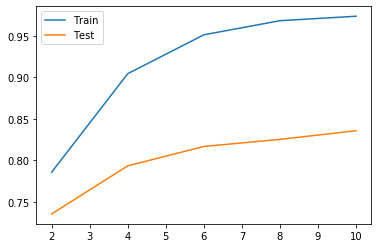

In [17]:
# Produce a plot with the score for the testing and training for the different max depths
sns.lineplot(x=max_depths,y=train_accuracies)
sns.lineplot(x=max_depths,y=testing_accuracies)
plt.legend(labels=['Train', 'Test'])


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

#The models tend to perform better as the max depth is higher.
#Paolo: At some point you could reach overfit

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

#The models bias tends to decrease when the max depth is higher however the 
#variance increases when the max depth is higher.
#Paolo:yes

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
#Max depth 6 seems the most optimal. There is a high score but doesn't seems to overfit. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# More than 40 years' passed so using this data would give some outdated results. 
# The world changes at a very high speed which keeps on increasing. 
# Would be convenient to have more columns in order to decrease bias and have a more accurate result.
# I don't think the data is applicable to other cities. 
#Paolo: ok